In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

In [2]:
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)


svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print(svm.score(X_test_scaled, y_test))

0.972027972027972


In [3]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [4]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [5]:
pipe.score(X_test, y_test)

0.972027972027972

In [6]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [7]:
param_grid = {'svm__C': [0.001,0.01,0.1,1,10,100],
             'svm__gamma': [0.001,0.01,0.1,1,10,100]}

In [8]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.9812311901504789
0.972027972027972
{'svm__C': 1, 'svm__gamma': 1}


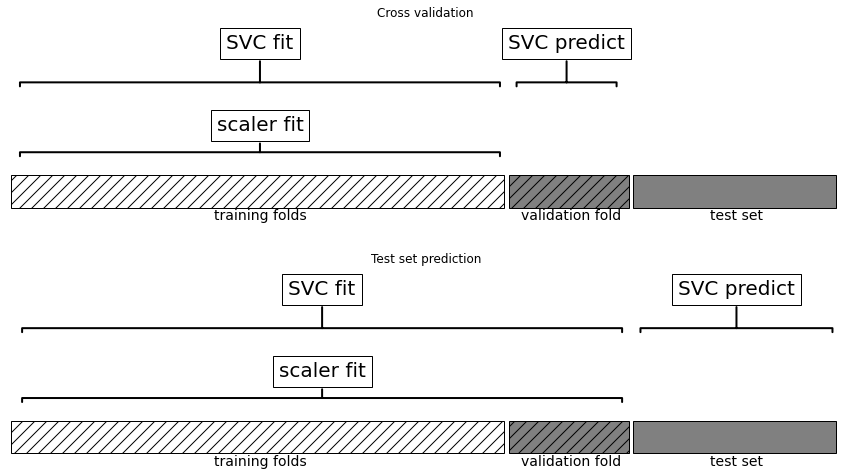

In [9]:
mglearn.plots.plot_proper_processing()

In [10]:
from sklearn.pipeline import make_pipeline

pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [11]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]

In [12]:
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
pipe.steps

[('standardscaler-1', StandardScaler()),
 ('pca', PCA(n_components=2)),
 ('standardscaler-2', StandardScaler())]

In [13]:
pipe.fit(cancer.data)

components = pipe.named_steps['pca'].components_
print(components.shape)

(2, 30)


In [14]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [15]:
param_grid = {'logisticregression__C': [0.01,0.1,1,10,100]}

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [17]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])

In [18]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.43570655, -0.34266946, -0.40809443, -0.5344574 , -0.14971847,
         0.61034122, -0.72634347, -0.78538827,  0.03886087,  0.27497198,
        -1.29780109,  0.04926005, -0.67336941, -0.93447426, -0.13939555,
         0.45032641, -0.13009864, -0.10144273,  0.43432027,  0.71596578,
        -1.09068862, -1.09463976, -0.85183755, -1.06406198, -0.74316099,
         0.07252425, -0.82323903, -0.65321239, -0.64379499, -0.42026013]])

In [20]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [21]:
param_grid = {'polynomialfeatures__degree': [1,2,3],
             'ridge__alpha': [0.001,0.01,0.1,1,10,100]}

In [24]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

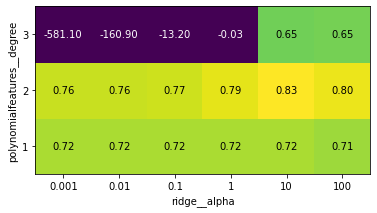

In [26]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3,-1),
                                      xlabel='ridge__alpha', ylabel='polynomialfeatures__degree',
                                      xticklabels=param_grid['ridge__alpha'],
                                       yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [29]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier':[SVC()], 'preprocessing':[StandardScaler()],
    'classifier__gamma':[0.001,0.01,0.1,1,10,100],
    'classifier__C':[0.001,0.01,0.1,1,10,100]},
    {'classifier':[RandomForestClassifier(n_estimators=100)],
    'preprocessing':[None], 'classifier__max_features':[1,2,3]}
]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC(C=10, gamma=0.01)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler()]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [31]:
grid.best_params_

{'classifier': SVC(C=10, gamma=0.01),
 'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}

In [32]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())],
               memory='cache_folder')